1.0


<IPython.core.display.Javascript object>


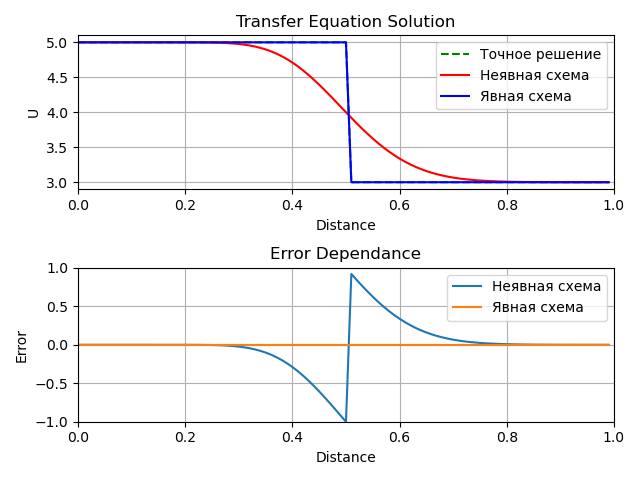

0

In [50]:
from matplotlib.pyplot import *
import numpy as np
%matplotlib notebook
# dont forget N/Nx = 1/2


N = 50
Nx = 100

H = 1
T = 1

a = 0.5
h =  H / Nx
t = T / N

d = a * t / h
print(d)
X = np.arange(0, H, h)
Y = np.arange(0, 10, h)

# Data arrays

Up = [0] * len(X)

U = [3] * len(X)
U[0] = 5

U1 = [3] * len(X)
U1[0] = 5

U2 = [3] * len(X)
U2[0] = 5

# Errors arrays

E1 = [0] * len(X) 
E2 = [0] * len(X)


subplot(211)
axis([0, 1, 2.9, 5.1])

xlabel('Distance')
ylabel('U')
title('Transfer Equation Solution')
grid()

ln1, = plot(X, Up, 'g--', label = 'Точное решение')
ln2, = plot(X, U1, 'r-', label = 'Неявная схема')
ln3, = plot(X, U2, 'b-', label = 'Явная схема')
tight_layout()
legend()


subplot(212)
axis([0, 1, -1, 1])

xlabel('Distance')
ylabel('Error')
title('Error Dependance')
grid()

ln4, = plot(X, E1, label = 'Неявная схема')
ln5, = plot(X, E2, label = 'Явная схема')
tight_layout()
legend()


def real():
    
    for i in range(Nx):
        
        if X[i] <= a * T:
            Up[i] = 5
            
        else:
            Up[i] = 3
            
    ln1.set_data(X, Up)
    
    return 0


def implicit():
    
    for time in np.arange(0, T, t):

        U = np.copy(U1)

        for i in range(1, Nx):
            U1[i] = 1 / (1 + d) * (U[i] + d * U1[i-1])

        ln2.set_data(X, U1)
        #gcf().canvas.draw()

        y = 0
        U1[y] = 5
        y += 1
        
    for j in range(0, Nx):
        E1[j] = (U1[j] - Up[j])
        ln4.set_data(X, E1)
    gcf().canvas.draw() 
    return 0
   
    
def explicit():
    
    for time in np.arange(0, T, t):
        
        U = np.copy(U2)
        
        for i in range(1, Nx):
            U2[i] = U2[i] + d * (U[i-1] - U[i])
            
        ln3.set_data(X,U2)
        #gcf().canvas.draw()

        y = 0
        U2[y] = 5
        y += 1
        
    for j in range(0, Nx):
        E2[j] = abs(U2[j] - Up[j])   
        ln5.set_data(X, E2)
    gcf().canvas.draw()  
    return 0

real()
implicit()
explicit()
